In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
comb = []
somelists = [[40, 120],[30, 95],[0.1, 0.5],['TT', 'AC']]
for element in itertools.product(*somelists):
    comb.append(element)
df = pd.DataFrame(comb)
df.to_csv('comb.csv')


# Experiment 1

In [74]:
df = pd.read_csv('RESULTS_ILIKEHBO_2023-01-19_1.csv')
df.columns = ['length', 'score', 'size', 'type', 'time']
df

,length,score,size,type,time
0,40,30,0.1,TT,18.252418
1,40,30,0.1,AC,24.765603
2,40,30,0.5,TT,19.438345
3,40,30,0.5,AC,24.467115
4,40,95,0.1,TT,14.054675
...,...,...,...,...,...
1595,120,30,0.5,AC,23.597589
1596,120,95,0.1,TT,20.347800
1597,120,95,0.1,AC,26.411416
1598,120,95,0.5,TT,20.884390


## Gatekeeper test

In [75]:
model = smf.ols('time ~ C(length) + C(score) + C(size) + C(type)', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1033.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:59:12   Log-Likelihood:                -3283.7
No. Observations:                1600   AIC:                             6577.
Df Residuals:                    1595   BIC:                             6604.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           22.8669      0.105    216.780      0.000      22.660      23.074
C(length)[T.120]     2.5884      0.094     27.435      0.000       2.403       2.773
C(score)[T.95]      -2.1558      0.094    -22.850      0.000      -2.341      -1.971
C(size)[T.0.5]      -0.0620      0.094     -0.657      0.511      -0.247       0.123
C(type)[T.TT]       -5.0414      0.094    -53.434      0.000      -5.226      -4.856
==============================================================================
Omnibus:                      310.633   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.585
Skew:                           0.009   Prob(JB):                     1.56e-14
Kurtosis:                       2.024   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model = smf.ols('time ~ C(length) * C(score) * C(size) * C(type)', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1229.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:59:15   Log-Likelihood:                -2276.8
No. Observations:                1600   AIC:                             4586.
Df Residuals:                    1584   BIC:                             4672.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       24.4363      0.101    242.149      0.000      24.238      24.634
C(length)[T.120]                                                -0.5332      0.143     -3.736      0.000      -0.813      -0.253
C(score)[T.95]                                                  -5.4459      0.143    -38.160      0.000      -5.726      -5.166
C(size)[T.0.5]                                                   0.0702      0.143      0.492      0.623      -0.210       0.350
C(type)[T.TT]                                                   -5.0674      0.143    -35.507      0.000      -5.347      -4.787
C(length)[T.120]:C(score)[T.95]                                  6.4303      0.202     31.860      0.000       6.034       6.826
C(length)[T.120]:C(size)[T.0.5]                                 -0.2793      0.202     -1.384      0.167      -0.675       0.117
C(score)[T.95]:C(size)[T.0.5]                                    0.0273      0.202      0.135      0.892      -0.369       0.423
C(length)[T.120]:C(type)[T.TT]                                  -0.0414      0.202     -0.205      0.838      -0.437       0.354
C(score)[T.95]:C(type)[T.TT]                                     0.3446      0.202      1.708      0.088      -0.051       0.741
C(size)[T.0.5]:C(type)[T.TT]                                    -0.1223      0.202     -0.606      0.545      -0.518       0.274
C(length)[T.120]:C(score)[T.95]:C(size)[T.0.5]                   0.2065      0.285      0.723      0.470      -0.353       0.766
C(length)[T.120]:C(score)[T.95]:C(type)[T.TT]                   -0.2713      0.285     -0.950      0.342      -0.831       0.289
C(length)[T.120]:C(size)[T.0.5]:C(type)[T.TT]                    0.3926      0.285      1.375      0.169      -0.167       0.952
C(score)[T.95]:C(size)[T.0.5]:C(type)[T.TT]                     -0.3187      0.285     -1.117      0.264      -0.879       0.241
C(length)[T.120]:C(score)[T.95]:C(size)[T.0.5]:C(type)[T.TT]    -0.1210      0.404     -0.300      0.764      -0.913       0.671
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.927
Skew:                          -0.052   Prob(JB):                        0.629
Kurtosis:                       2.943   Cond. No.                         47.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
comb = []
somelists = [[40, 120],[75, 95],[0.1, 0.5],['TT', 'AC']]
for element in itertools.product(*somelists):
    comb.append(list(element))
full = []
for i in range(len(comb)):
    full.append(comb[i]+[i+1])
df_cond = pd.DataFrame(full)
df_cond.columns = ['length', 'score', 'size', 'type', 'condition']
df2 = df.merge(df_cond, on = ['length', 'score', 'size', 'type'], how = 'left')

In [78]:
df2.groupby(['length', 'score', 'size', 'type']).mean()

time  condition
length score size type                      
40     30    0.1  AC    24.436325        NaN
                  TT    19.368926        NaN
             0.5  AC    24.506539        NaN
                  TT    19.316845        NaN
       95    0.1  AC    18.990388        6.0
                  TT    14.267638        5.0
             0.5  AC    19.087900        8.0
                  TT    13.924152        7.0
120    30    0.1  AC    23.903151        NaN
                  TT    18.794365        NaN
             0.5  AC    23.694034        NaN
                  TT    18.855540        NaN
       95    0.1  AC    24.887477       14.0
                  TT    19.852061       13.0
             0.5  AC    24.912142       16.0
                  TT    19.707276       15.0

In [79]:
df.groupby(['type']).mean().index

Index(['AC', 'TT'], dtype='object', name='type')

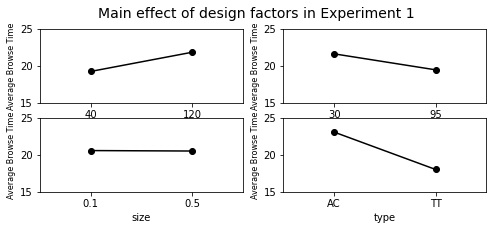

In [88]:
# Main effect for colour

col = ['length', 'score', 'size', 'type']
fig, axes =plt.subplots(2, 2, figsize = (8,3))
axes = axes.flatten()

for i in range(len(col)):
    group = df.groupby([col[i]]).mean()
    axes[i].plot([1,2], group['time'], marker = 'o', c = "black")
    axes[i].set_ylim([15,25])
    axes[i].set_xlim([0.5,2.5])
    axes[i].set_ylabel("Average Browse Time",fontsize = 8)
    axes[i].set_xlabel(col[i])
    axes[i].set_xticks([1,2])
    axes[i].set_xticklabels(list(group.index))
fig.suptitle('Main effect of design factors in Experiment 1', fontsize=14)
plt.show()

In [85]:
two_way = []
for i in itertools.combinations(col,2):
    two_way.append(list(i))
len(two_way)

6

In [67]:
two_way

[['length', 'score'],
 ['length', 'size'],
 ['length', 'type'],
 ['score', 'size'],
 ['score', 'type'],
 ['size', 'type']]

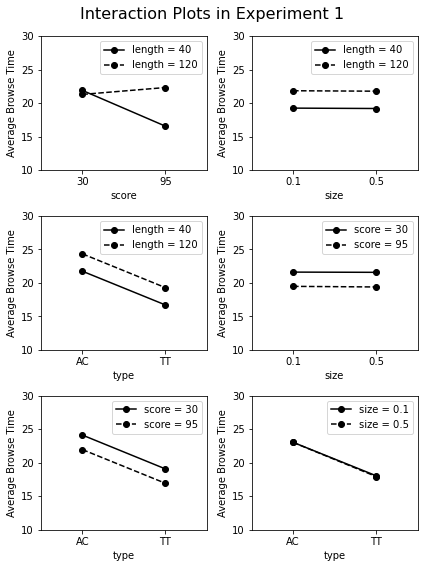

In [73]:
# Main effect for colour

fig, axes =plt.subplots(2, 3, figsize = (6,8))
axes = axes.flatten()

for i in range(len(two_way)):
    group = df.groupby(two_way[i]).mean()
    axes[i].plot([1,2], group[0:2]['time'], marker = 'o', c = "black", label = str(group.index.names[0]) + ' = ' + str(group.index[0][0]))
    axes[i].plot([1,2], group[2:4]['time'], linestyle = '--', marker = 'o', c = "black", label = str(group.index.names[0]) + ' = ' + str(group.index[2][0]))
    axes[i].set_ylim([10,30])
    axes[i].set_xlim([0.5,2.5])
    axes[i].set_ylabel("Average Browse Time")
    axes[i].set_xlabel(group.index.names[1])
    axes[i].set_xticks([1,2])
    axes[i].set_xticklabels([group.index[0][1], group.index[1][1]])
    axes[i].legend(loc = 'upper right')
fig.suptitle('Interaction Plots in Experiment 1', fontsize=16)
plt.tight_layout()
plt.show()

# Experiment 2

In [34]:
df = pd.read_csv('RESULTS_ILIKEHBO_2023-01-19.csv')
df.columns = ['length', 'score', 'size', 'type', 'time']
df

,length,score,size,type,time
0,75,50,0.2,TT,16.133303
1,75,70,0.2,TT,10.838728
2,75,90,0.2,TT,13.133192
3,85,50,0.2,TT,17.574455
4,85,70,0.2,TT,11.594048
...,...,...,...,...,...
895,85,70,0.2,TT,11.428432
896,85,90,0.2,TT,14.129596
897,95,50,0.2,TT,16.143302
898,95,70,0.2,TT,12.695603


In [35]:
model = smf.ols('time ~ C(length) * C(score) * C(size) * C(type)', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     479.9
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          7.93e-317
Time:                        17:11:51   Log-Likelihood:                -1275.9
No. Observations:                 900   AIC:                             2570.
Df Residuals:                     891   BIC:                             2613.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         15.9841      0.100    159.243      0.000      15.787      16.181
C(length)[T.85]                   -0.1497      0.142     -1.054      0.292      -0.428       0.129
C(length)[T.95]                   -0.5921      0.142     -4.171      0.000      -0.871      -0.313
C(score)[T.70]                    -5.6356      0.142    -39.700      0.000      -5.914      -5.357
C(score)[T.90]                    -3.2064      0.142    -22.588      0.000      -3.485      -2.928
C(length)[T.85]:C(score)[T.70]     1.0543      0.201      5.252      0.000       0.660       1.448
C(length)[T.95]:C(score)[T.70]     3.8938      0.201     19.396      0.000       3.500       4.288
C(length)[T.85]:C(score)[T.90]     1.4860      0.201      7.402      0.000       1.092       1.880
C(length)[T.95]:C(score)[T.90]     4.4483      0.201     22.158      0.000       4.054       4.842
==============================================================================
Omnibus:                        1.683   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.590
Skew:                          -0.101   Prob(JB):                        0.452
Kurtosis:                       3.043   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
comb = []
somelists = [[75, 85, 95],[50, 70, 90],[0.2],['TT']]
for element in itertools.product(*somelists):
    comb.append(list(element))
full = []
for i in range(len(comb)):
    full.append(comb[i]+[i+1])
df_cond = pd.DataFrame(full)
df_cond.columns = ['length', 'score', 'size', 'type', 'condition']
df2 = df.merge(df_cond, on = ['length', 'score', 'size', 'type'], how = 'left')

In [37]:
df2.groupby(['length', 'score', 'size', 'type']).mean()

time  condition
length score size type                      
75     50    0.2  TT    15.984143        1.0
       70    0.2  TT    10.348553        2.0
       90    0.2  TT    12.777731        3.0
85     50    0.2  TT    15.834489        4.0
       70    0.2  TT    11.253222        5.0
       90    0.2  TT    14.114063        6.0
95     50    0.2  TT    15.392093        7.0
       70    0.2  TT    13.650341        8.0
       90    0.2  TT    16.633995        9.0

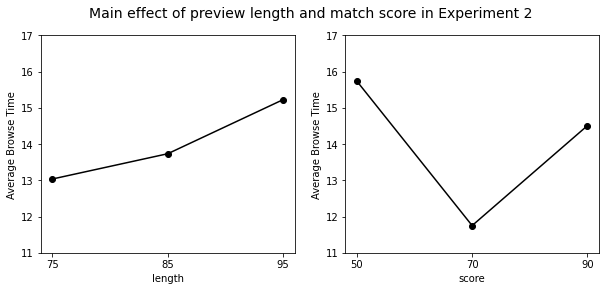

In [47]:
# Main effect for length and score

col = ['length', 'score']

fig, axes =plt.subplots(1, 2, figsize = (10,4))
axes = axes.flatten()

for i in range(len(col)):
    group = df.groupby([col[i]]).mean()
    axes[i].plot(list(range(1,len(group['time'])+1)), group['time'], marker = 'o', c = "black")
    axes[i].set_ylim([11,17])
    # axes[i].set_xlim([0.5,2.5])
    axes[i].set_ylabel("Average Browse Time")
    axes[i].set_xlabel(col[i])
    axes[i].set_xticks(list(range(1,len(group['time'])+1)))
    axes[i].set_xticklabels(list(group.index))
fig.suptitle('Main effect of preview length and match score in Experiment 2', fontsize=14)
plt.show()

Text(0.5, 0.98, 'Length-by-Score Interaction in Experiment 2')

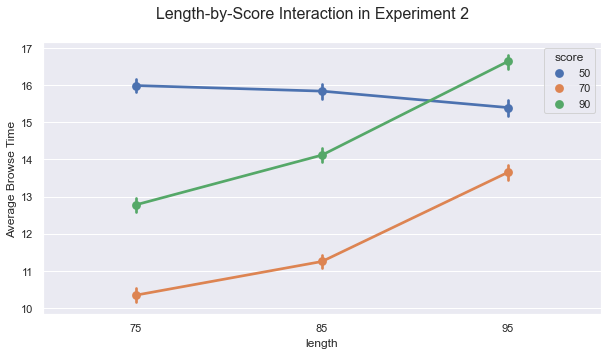

In [18]:
# Interaction between x1 and x2
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
fig12 = sns.pointplot(x="length", hue="score", y="time", data=df)
fig12.set_ylabel("Average Browse Time")
fig12.set_xlabel("length")
plt.suptitle("Preview_Length-by-Match_Score Interaction in Experiment 2",fontsize=16)

In [26]:
import numpy as np
df[(df['length'] >= 70) & (df['length'] <=80) & (df['score'] <=60) & (df['score'] <=70)]

,length,score,size,type,time
0,75,50,0.2,TT,16.133303
9,75,50,0.2,TT,15.904748
18,75,50,0.2,TT,16.090104
27,75,50,0.2,TT,16.082484
36,75,50,0.2,TT,16.479519
...,...,...,...,...,...
855,75,50,0.2,TT,14.685625
864,75,50,0.2,TT,16.545327
873,75,50,0.2,TT,15.629514
882,75,50,0.2,TT,16.087837


# Experiment 3

In [48]:
df = pd.read_csv('RESULTS_ILIKEHBO_2023-01-20.csv')
df.columns = ['length', 'score', 'size', 'type', 'time']
df

,length,score,size,type,time
0,60,65,0.2,TT,13.977968
1,60,70,0.2,TT,12.391195
2,60,75,0.2,TT,9.799750
3,70,65,0.2,TT,11.311743
4,70,70,0.2,TT,13.433873
...,...,...,...,...,...
895,70,70,0.2,TT,10.346769
896,70,75,0.2,TT,10.723812
897,80,65,0.2,TT,11.348174
898,80,70,0.2,TT,11.855139


In [49]:
model = smf.ols('time ~ C(length) * C(score) * C(size) * C(type)', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     98.08
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          9.79e-117
Time:                        17:22:47   Log-Likelihood:                -1243.1
No. Observations:                 900   AIC:                             2504.
Df Residuals:                     891   BIC:                             2547.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         13.3767      0.097    138.219      0.000      13.187      13.567
C(length)[T.70]                   -2.0606      0.137    -15.056      0.000      -2.329      -1.792
C(length)[T.80]                   -2.1539      0.137    -15.737      0.000      -2.422      -1.885
C(score)[T.70]                    -1.3433      0.137     -9.815      0.000      -1.612      -1.075
C(score)[T.75]                    -1.6481      0.137    -12.042      0.000      -1.917      -1.379
C(length)[T.70]:C(score)[T.70]     0.7009      0.194      3.621      0.000       0.321       1.081
C(length)[T.80]:C(score)[T.70]     0.6379      0.194      3.296      0.001       0.258       1.018
C(length)[T.70]:C(score)[T.75]     0.9120      0.194      4.712      0.000       0.532       1.292
C(length)[T.80]:C(score)[T.75]     0.8375      0.194      4.327      0.000       0.458       1.217
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.717
Skew:                          -0.130   Prob(JB):                       0.0348
Kurtosis:                       3.335   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
df.head()

,length,score,size,type,time
0,60,65,0.2,TT,13.977968
1,60,70,0.2,TT,12.391195
2,60,75,0.2,TT,9.799750
3,70,65,0.2,TT,11.311743
4,70,70,0.2,TT,13.433873


In [51]:
comb = []
somelists = [[60, 70, 80],[65, 70, 75],[0.2],['TT']]
for element in itertools.product(*somelists):
    comb.append(list(element))
full = []
for i in range(len(comb)):
    full.append(comb[i]+[i+1])
df_cond = pd.DataFrame(full)
df_cond.columns = ['length', 'score', 'size', 'type', 'condition']
df2 = df.merge(df_cond, on = ['length', 'score', 'size', 'type'], how = 'left')

In [52]:
df2.groupby(['length', 'score', 'size', 'type']).mean()

time  condition
length score size type                      
60     65    0.2  TT    13.376682        1.0
       70    0.2  TT    12.033410        2.0
       75    0.2  TT    11.728615        3.0
70     65    0.2  TT    11.316041        4.0
       70    0.2  TT    10.673711        5.0
       75    0.2  TT    10.579981        6.0
80     65    0.2  TT    11.222802        7.0
       70    0.2  TT    10.517436        8.0
       75    0.2  TT    10.412270        9.0

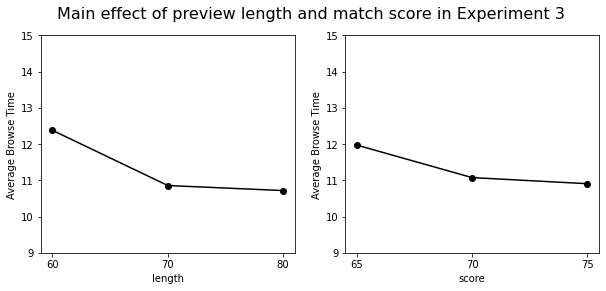

In [55]:
# Main effect for length and score

col = ['length', 'score']

fig, axes =plt.subplots(1, 2, figsize = (10,4))
axes = axes.flatten()

for i in range(len(col)):
    group = df.groupby([col[i]]).mean()
    axes[i].plot(list(range(1,len(group['time'])+1)), group['time'], marker = 'o', c = "black")
    axes[i].set_ylim([9,15])
    # axes[i].set_xlim([0.5,2.5])
    axes[i].set_ylabel("Average Browse Time")
    axes[i].set_xlabel(col[i])
    axes[i].set_xticks(list(range(1,len(group['time'])+1)))
    axes[i].set_xticklabels(list(group.index))
fig.suptitle('Main effect of preview length and match score in Experiment 3', fontsize=16)
plt.show()

Text(0.5, 0.98, 'Preview_Length-by-Match_Score Interaction')

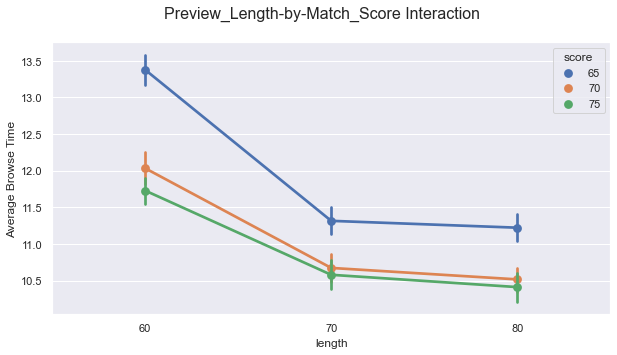

In [36]:
# Interaction between x1 and x2
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
fig12 = sns.pointplot(x="length", hue="score", y="time", data=df)
fig12.set_ylabel("Average Browse Time")
fig12.set_xlabel("length")
plt.suptitle("Preview_Length-by-Match_Score Interaction",fontsize=16)